# Modelling a Sigmoid Neuron

## Non-technical explanation

Inside the human brain is a neural network composed of around 100 billion neurons. In this neural network, each neuron is connected to many other neurons. 

In this notebook, we look at modelling an artificial neuron. We will create a neuron that can accept any number of input voltages and then determine what its output voltage will be. We will create a certain type of neuron called a **sigmoid neuron** because it uses a **sigmoid function** to determine what its output will be based upon the inputs it receives. 

We will create our neuron so that it has **weights** and a **bias**. Each of the inputs coming into our neuron will receive a weight that represents its individual importance in getting the neuron to fire. The bias of the neuron will be a measure of how easy the neuron wants to fire in general. If the bias is high, the neuron will fire easy. If it is low, then the neuron will be biased towards not firing. 


## Technical explanation

### Creating the Neuron class



Define the sigmoid function, $\sigma(z)$, that is pivotal in creating a sigmoid neuron.

$ \sigma(z) = \frac{1}{1+e^{-z}} $

In [1]:
import numpy as np

def sigmoid(z):
    
    return 1/(1+np.exp(-z))

Create a ```class``` that is initialised with a list ```weights``` and a single integer ```bias```.

In [2]:
class Neuron:
    
    def __init__(self, weights, bias):
        
        self.weights = weights
        self.bias = bias

Add a class method called ```output``` to the ```Neuron``` class. The output class method will determine what the output of the neuron will be given by the formula:

$output = \sigma (weights \cdot input + bias)$

In [3]:
def output(self, input):
        
    z = np.dot(self.weights, input) + self.bias
        
    return sigmoid(z) 

# Add the function output to the Neuron class.
Neuron.output = output 



We have built a generic artificial neuron. Let's now create a sample neuron called ```a``` and test it. We will create a neuron with two inputs $x_1$ and $x_2$. We will give each of these two inputs  a weight and define a bias for the neuron overall. 

In [4]:
x1_weight = 1
x2_weight = -2
bias = -1

a = Neuron(weights = [x1_weight, x2_weight], 
           bias = bias)


Let's give our neuron two inputs and see what output it provides. 

In [5]:
x1_input = 1
x2_input = 1

a.output(input=[x1_input,x2_input])

0.11920292202211755

### Creating a graph of neuron output versus bias

We aim to create a graph that shows how the bias affects a neuron's output. We will use the previous neuron, ```a```, we created and keep its inputs and weights the same, but vary the bias of the neuron. 

In an effort to do this, we create a list ```biases``` that will be biases that we will sample from.

In [6]:
biases = np.linspace(-6, 6, 100)

We create an empty list `output` and populate it with the outputs of the neuron for each of the biases on our `biases` list. 

In [7]:
outputs = []
for b in biases:
    a.bias = b
    outputs.append(a.output(input=[x1_input, x2_input]))
    

We use the python library `matplotlib` to plot the elements in the `biases` list with the elements in the `outputs` list.

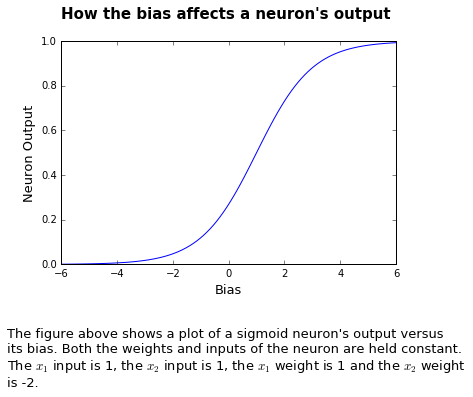

In [8]:
import matplotlib.pyplot as plt

plt.plot(biases, outputs)
plt.title('How the bias affects a neuron\'s output \n', fontsize=15, fontweight= 'bold')
                  
          
plt.xlabel('Bias', fontsize=13)
plt.ylabel('Neuron Output', fontsize=13)

caption = 'The figure above shows a plot of a sigmoid neuron\'s output versus\nits bias. Both the weights and inputs of the neuron are held constant.\nThe $x_1$ input is %s, the $x_2$ input is %s, the $x_1$ weight is %s and the $x_2$ weight\nis %s.' %(x1_input, x2_input, x1_weight, x2_weight)
plt.figtext(0, -0.3, caption, fontsize=13) 


plt.show()
plt.close()

### Creating a heatmap of neuron output 

Let's now create a neuron called `a` that has a bias, two inputs and two weights.

In [9]:
x1_weight = 1
x2_weight = -2
bias = 0

a = Neuron(weights = [x1_weight, x2_weight], 
           bias = bias)

We create two lists `x1_inputs` and `x2_inputs` that represent the inputs we will sample for the neuron.

In [10]:
x1_inputs = np.linspace(0,5,100)
x2_inputs = np.linspace(0,5,100)

We initialise an array `Z` whose elements will contain the outputs for each of the inputs.

In [11]:
X, Y = np.meshgrid(x1_inputs, x2_inputs)
Z = np.zeros((x1_inputs.size, x2_inputs.size))

We now populate the array `Z` with the relevant outputs of the neuron.

In [12]:
for i in range(x1_inputs.size):
    for j in range(x2_inputs.size):
        Z[i,j] = a.output(input=[X[i,j],Y[i,j]])

We use the `pcolor` function of `matplotlib` to create a heat map. 

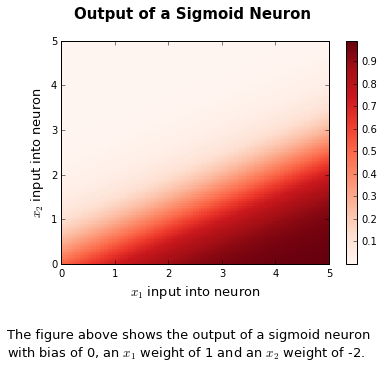

In [13]:
plt.pcolor(X, Y, Z, cmap='Reds')
plt.colorbar()

plt.title('Output of a Sigmoid Neuron \n', fontsize=15, fontweight='bold')
plt.xlabel('$x_1$ input into neuron', fontsize=13)          
plt.ylabel('$x_2$ input into neuron', fontsize=13)
           
caption = 'The figure above shows the output of a sigmoid neuron\nwith bias of %s, an $x_1$ weight of %s and an $x_2$ weight of %s.' %(bias, x1_weight, x2_weight)
plt.figtext(0, -0.2, caption, fontsize=13)

plt.show()
plt.close()